# Importing required modules

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

You can see what's in a module using `dir` (I will not actually run it because it prints out a lot)

In [3]:
# dir(nx)

NetworkX has a lot of stuff in it. As such, the following is a #badidea, for any module.

In [4]:
# from networkx import *

#Basic data types in NetworkX
NetworkX provides the following classes that represent network-related data,
as well as network analysis algorithms that operate on these objects:

**Graph**       - Undirected graph with self loops

**DiGraph**      - Directed graph with self loops

**MultiGraph**   - Undirected Graph with self loops and multiple edges

**MultiDiGraph** - Directed Graph with self loops and multiple edges

#Getting started
Create an empty, undirected network

In [4]:
G = nx.Graph()

In [5]:
nx.__version__

'2.0'

#Nodes
Nodes can be almost anything, including numbers, strings, GPS coordinates, you name it.

Nodes can be added one at a time:

In [6]:
G.add_node(0)
G.add_node("John")

# tuple object representing, say, longitude and latitude
pos = (1.2, 3.4) 
G.add_node(pos)

...or many at once from a python container

In [7]:
# [1,2,3] is a list containing 1, 2, and 3
G.add_nodes_from([1, 2, 3])

# Node attributes
Nodes can have arbitrary attributes associated with them, contained in a string-index dictionary

Adding attributes at the time of node creation using keyword arguments:

In [13]:
G.add_node("Louis", eye_color='blue', height=6)

You can also add attributes to an already existing node

In [14]:
G.add_node("Laszlo")

# add an attribute "citations" with value 10**6 to Laszlo
G.nodes["Laszlo"]["citations"] = 10**6

G.nodes[n] gives a dictionary containing all the attribute:value pairs associated with node n

In [15]:
print("Louis's eyes are ", G.nodes["Louis"]["eye_color"], " and he is ", G.nodes['Louis']['height'], " feet tall.")
print("Laszlo has ", G.nodes["Laszlo"]["citations"], " citations.")

Louis's eyes are  blue  and he is  6  feet tall.
Laszlo has  1000000  citations.


#Edges

An edge between node1 and node2 is represented by a tuple (node1, node2)  
They can be added one at a time:

In [16]:
# add edge between node 0 and node 1
G.add_edge(0, 1)

Or many at once from a container

In [17]:
edge_list = [ (2, 1), ("Louis", "Laszlo"), (3, 4) ]
G.add_edges_from(edge_list)

**Note:** Nodes will be automatically created if they don't already exist.

# Edge attributes
Like nodes, edges can also have arbitrary attributes. An important and special one (for many algorithms) is "weight"  

The syntax for adding/accessing edge attributes is the similar to that for nodes:

In [20]:
G.add_edge("Louis", "Sebastian", weight=10)

G.add_edge("Hopkinton", "Boston")
G.edges["Hopkinton", "Boston"]['distance'] = 26.2

`G.edges[node1, node2]` is a dictionary containing all attribute:value pairs associated with the edge from node1 to node2

# Basic operations

### Size of the network

In [24]:
# number of nodes
print(G.number_of_nodes())

# more pythonic way
print(len(G))

# number of edges
print(G.number_of_edges())

# better
print(G.size())

# how to do string formatting
print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

13
13
6
6
G has 13 nodes and 6 edges.


###Testing to see whether nodes or edges exist

In [25]:
G.has_node("Louis")

True

More pythonic way

In [27]:
"Sebastian" in G

True

For edges, you must use has_edge (no syntax like `edge in G`)

In [28]:
print(G.has_edge(3, 4))
print(G.has_edge("Louis", 0))

True
False


### Finding neighbors of a node

In [29]:
list(G.neighbors(1))

[0, 2]

* In `DiGraph` objects, `G.neighbors(node)` gives the successors of `node`, as does `G.successors(node)`  
* Predecessors of `node` can be obtained with `G.predecessors(node)`

###Iterating over nodes and edges
Nodes and edges can be iterated over with `G.nodes()` and `G.edges()` respectively  

In [30]:
for node, data in G.nodes(data=True): # data=True includes node attributes as dictionaries
    print("Node {0}\t\t\t: {1}".format(node, data))

Node 0			: {}
Node John			: {}
Node (1.2, 3.4)			: {}
Node 1			: {}
Node 2			: {}
Node 3			: {}
Node Sean			: {'eye_color': 'blue', 'height': 6}
Node Laszlo			: {'citations': 1000000}
Node Louis			: {'eye_color': 'blue', 'height': 6}
Node 4			: {}
Node Sebastian			: {}
Node Hopkinton			: {}
Node Boston			: {}


In [31]:
for n1, n2, data in G.edges(data=True):
    print("{0} <----> {1}: {2}".format(n1, n2, data))

0 <----> 1: {}
1 <----> 2: {}
3 <----> 4: {}
Laszlo <----> Louis: {}
Louis <----> Sebastian: {'weight': 10}
Hopkinton <----> Boston: {'distance': 26.2}


### Calculating degrees

In [33]:
# one node
print(G.degree("Louis")) # returns an integer

# all nodes (returns a dictionary with node : degree pairs for all nodes)
print(G.degree())

# just the degree sequence
print([G.degree(node) for node in G])

2
[(0, 1), ('John', 0), ((1.2, 3.4), 0), (1, 2), (2, 1), (3, 1), ('Sean', 0), ('Laszlo', 1), ('Louis', 2), (4, 1), ('Sebastian', 1), ('Hopkinton', 1), ('Boston', 1)]
[1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1]


As you know, in directed graphs (of class `DiGraph`) there are two types of degree. Things work just as you expect
* `G.in_degree(node) `
* `G.out_degree(node) # same as G.degree()`


#Other operations

* ***`subgraph(G, nbunch)` or `G.subgraph(nbunch)`***       
subgraph of G induced by nodes in nbunch    

* ***`reverse(G)`***       
DiGraph with edges reversed 

* ***`union(G1, G2)`***      
graph union    

* ***`disjoint_union(G1, G2)`***     
same, but treats nodes of G1, G2 as different 

* ***`intersection(G1, G2)`***      
graph with only the edges in common between G1, G2

* ***`difference(G1, G2)`***      
graph with only the edges G1 that aren't in G2

* ***`copy(G)` or `G.copy()`***     
copy of G

* ***`complement(G)` or `G.complement()`***     
the complement graph of G 

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
undirected version of G (a Graph or MultiGraph)  

* ***`convert_to_directed(G)` or `G.to_directed()`***      
directed version of G (a DiGraph of MultiDiGraph)

* ***`adjacency_matrix(G)`***      
adjacency matrix A of G (in sparse matrix format; to get full matrix, use A.toarray() )

# Graph I/O

Usually you will not be building a network from scratch one node/link at a time. Instead, you will
want to read it in from an appropriate data file. NetworkX can understand the following common graph
formats:

* edge lists
* adjacency lists
* GML
* GEXF
* Python 'pickle'
* GraphML
* Pajek
* LEDA
* YAML

# Getting started: reading in an edge list
Put the file `test.txt` from .zip data file into your working directory for IPython  
If you don't know the present working directory, you can get it by typing  

`%pwd`

in any cell

Read in the file with the following options
* lines starting with `#` are treated as comments and ignored  
* use a `Graph` object to hold the data (i.e., network is undirected)  
* data are separated by whitespace (' ')
* nodes should be treated as integers (`int`)
* encoding of the text file containing the edge list is utf-8

In [34]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('./test.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Allowed formats
* Node pairs with no data  
`1 2`
* Node pairs with python dictionary  
`1 2 {weight:7, color:"green"}`

# Basic analysis
A large number of basic analyses can be done in one line using NetworkX + numpy or builtin python functions like `min`, `max`, etc.

In [35]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [36]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  443
Number of edges:  540

Average degree:  2.4379232505643342
Average degree (alternate calculation) 2.4379232505643342

Minimum degree:  1
Maximum degree:  8


# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

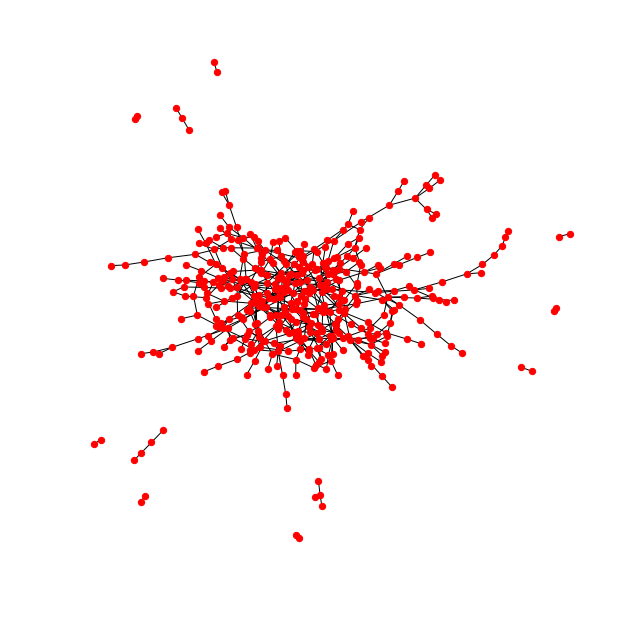

In [38]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=40)

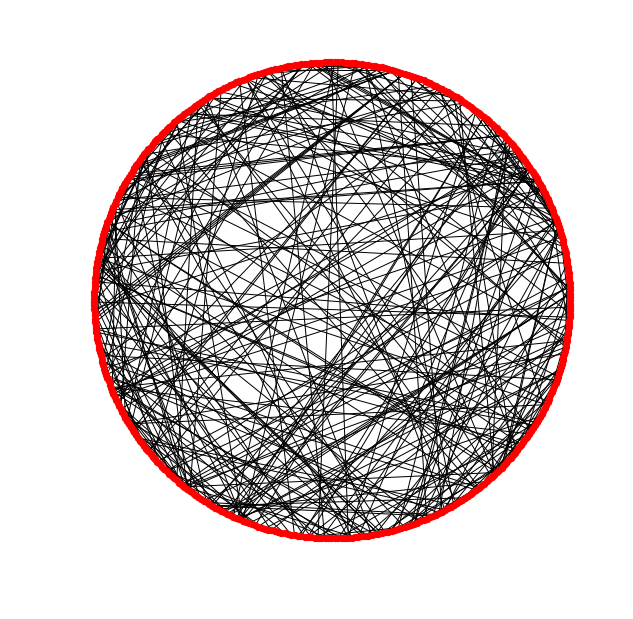

In [39]:
# using the fcircular layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=40)

# Plotting the degree distribution

Let's plot it in log scale first

`numpy` can be used to get logarithmically-spaced bins between the minimum and maximum degree

In [40]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

now plot it

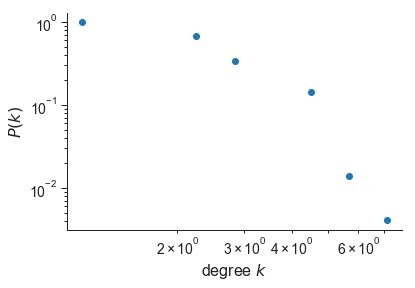

In [41]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

This is clearly not a network withe anything like a heavy-tailed or power law degree distribution.
Let's also plot it in linear-linear scale.

The `linspace` command in `numpy` is used to get linearly-spaced numbers between two extremes

In [42]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

Now plot it

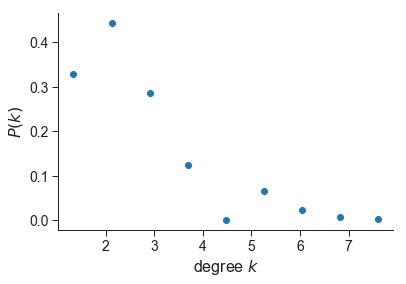

In [43]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

# Hands-on exercise
Now split into 6 groups, 3 for `example_1.txt` and 3 for `example_2.txt`. Each group should read in their edge
list file and do the following:
* Group 1: Do the basic measurements shown above. What can you suspect about the degree distribution of the network just based on the average and extremes in degree?
* Group 2: Plot the degree distribution in log-log scale. Also plot it in linear scale. Comment on how this fits with the analysis of Group 1.
* Group 3: Draw the network using the two layout algorithms shown above. How does the the network's appearance echo the findings of groups 1 and 2?